<a href="https://colab.research.google.com/github/gabihgodinho/Data-Science-Projects/blob/main/UV_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Accessing Environmental Patterns: A Data Science approach to UV Time Series in a Brazilian Amazon site** ##


In this post, I will explain about Solar Ultraviolet Radiation and why it's important to study this part of the solar spectrum. Moreover, I'll show you how to use Python to analyze UV variability. You'll learn how to apply Python's data analysis tools to extract meaningful patterns and insights from UV radiation data, illustrating the practical use of data science in environmental research.

In this post, the monthly and seasonal variability of the incident UVI in Santarém, Pará, is analyzed. For this, a 13-year time series of daily UVI data from the OMI satellite instrument was used, as
well as the 13-year UVI time series from the GOME-2 satellite instrument.

In this [article](https://periodicos.ufsm.br/cienciaenatura/article/view/76670?articlesBySameAuthorPage=2),you can find more information about the UVI and the satellite data used, as well as a full discussion of the results similar to the ones analyzed here.The tutorial on how to download this type of data you can find [here](https://medium.com/@gabrielagodinho/easy-guide-to-omi-gome-2-uv-index-data-83184ea7a4c1).





---
To get started, you need to install the necessary libraries and import them. In this case, I only needed to install pvlib, as the rest were already installed.

**pvlib** is a Python package used for simulating the performance of photovoltaic energy systems. It's widely used in solar energy research and projects for tasks like solar resource modeling, energy production estimation, and system simulation.

In [ ]:
#install the missing library
!pip install pvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 9.0 MB/s eta 0:00:00


In [ ]:
# importing useful libraries

from google.colab import files  # Handling files in Google Colab
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations, array processing
import matplotlib.pyplot as plt  # Plotting and visualization
import os  # Operating system interfaces, file path handling
import seaborn as sns  # Advanced data visualization
from scipy import stats  # Statistical functions
from scipy.stats import friedmanchisquare  # Friedman test for statistics
from matplotlib.ticker import PercentFormatter  # Formatting tick labels as percentages
from datetime import datetime  # Date and time handling
import csv  # CSV file reading and writing
import matplotlib.patches as mpatches  # Creating patch elements for matplotlib
import statsmodels.api as sm  # Statistical models, hypothesis tests
import pvlib  # Photovoltaic system modeling
from pvlib.location import Location  # Handling locations in pvlib
import matplotlib.dates as mdates  # Handling dates in matplotlib
from dateutil import tz  # Timezone handling
import matplotlib.ticker as plticker  # Handling tick placement in matplotlib
from scipy import interpolate  # Interpolation functions
from scipy.interpolate import make_interp_spline  # Creating smooth spline interpolations


In [ ]:
#uploading files from your machine to Colab
uploaded = files.upload()


Saving gome_stm_edit.csv to gome_stm_edit.csv
Saving omi_stm_edit.csv to omi_stm_edit.csv


The files used in this example can be downloaded by following this [tutorial](https://medium.com/@gabrielagodinho/easy-guide-to-omi-gome-2-uv-index-data-83184ea7a4c1).



In [ ]:
# load OMI and GOME-2 data for Santarém, in the state of Pará, Brazil (stm)

df_stm = pd.read_csv('omi_stm_edit.csv', sep=',', index_col='time', parse_dates=True)
# Reads a CSV file into a DataFrame.
# 'omi_stm_edit.csv': The file name of the OMI data for Santarém.
# sep=',': Specifies that the separator in the CSV file is a comma.
# index_col='time': Sets the 'time' column as the index of the DataFrame.
# parse_dates=True: Parses the 'time' column as DateTime objects for easier date handling.

gome_stm = pd.read_csv('gome_stm_edit.csv', sep=',', index_col='date', parse_dates=True)
# Reads another CSV file into a DataFrame.
# 'gome_stm_edit.csv': The file name of the GOME-2 data for Santarém.

df_stm.head(), gome_stm.head()
# Displays the first few rows of both DataFrames.
# df_stm.head(): Shows the first few rows of the OMI data DataFrame.
# gome_stm.head(): Shows the first few rows of the GOME-2 data DataFrame.


(             OMI
 time            
 2005-01-01  12.0
 2005-01-02  12.0
 2005-01-03  13.0
 2005-01-04  12.0
 2005-01-05  13.0,
             GOME2  year
 date                   
 2008-01-01    NaN  2008
 2008-01-02    NaN  2008
 2008-01-03    8.0  2008
 2008-01-04   10.0  2008
 2008-01-05    8.0  2008)

In [ ]:
df_stm.describe()
# Generates descriptive statistics for the DataFrame 'df_stm'.
# This includes count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile),
# 75th percentile (Q3), and maximum value for each numeric column in 'df_stm'.

gome_stm.describe()
# Similarly, generates descriptive statistics for the DataFrame 'gome_stm'.

(               OMI
 count  5212.000000
 mean     10.565234
 std       2.002245
 min       2.000000
 25%      10.000000
 50%      11.000000
 75%      12.000000
 max      16.000000,
              GOME2         year
 count  4024.000000  5114.000000
 mean      9.133449  2014.499609
 std       2.393095     4.031911
 min       0.000000  2008.000000
 25%       8.000000  2011.000000
 50%      10.000000  2014.500000
 75%      11.000000  2018.000000
 max      15.000000  2021.000000)

We can see that the dataframe containing OMI data has more days of data (5212) than the dataframe containing GOME-2 data (4024), and we can also see that the gome_stm dataframe has two columns, while the other only has one. Let's plot these time series to get a first idea of their behavior.

<Axes: xlabel='date'>

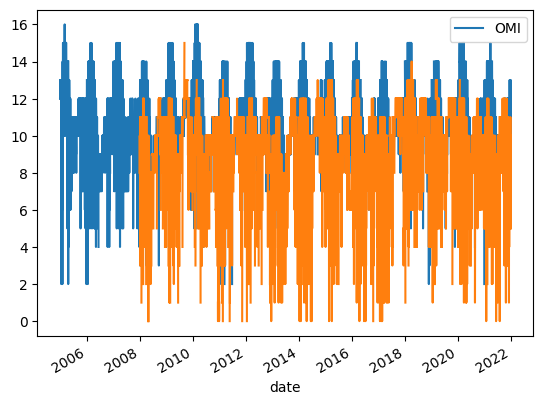

In [ ]:
df_stm.plot()
# This line creates a plot for the DataFrame 'df_stm'.
# By default, pandas will create a line plot for each of the numerical columns in 'df_stm'.
# The x-axis will typically be the DataFrame's index (if it's a DateTimeIndex, it will be used for the x-axis), and the y-axis will represent the values of the columns.

gome_stm.GOME2.plot()
# This line creates a plot specifically for the 'GOME2' column in the 'gome_stm' DataFrame.
# Similar to the first line, this will create a line plot where the x-axis is the DataFrame's index and the y-axis represents the values in the 'GOME2' column.

The plot shows that the df_stm series is longer than the gome_stm series, starting in 2006 (OMI) and 2008 (GOME-2). You can also see that according to OMI, the UV indices are higher than according to GOME-2.

Now, a more elaborated plot:

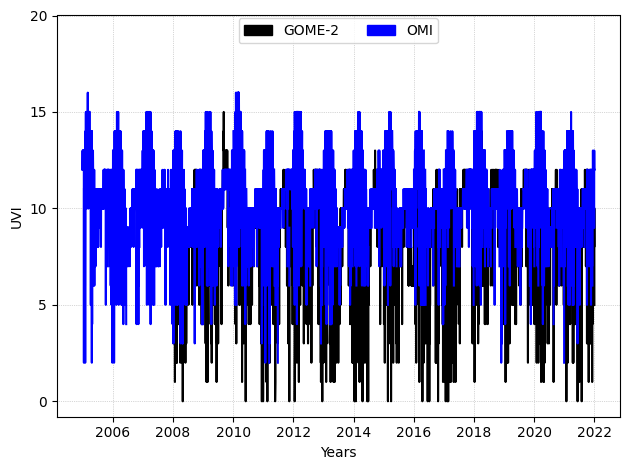

In [ ]:
# Creating a figure and axes for plotting
figure, axes = plt.subplots(nrows=1, ncols=1)

# Creating legend patches for identification in the plot
black_patch = mpatches.Patch(color='black', label='GOME-2')  # Legend patch for GOME-2
blue_patch = mpatches.Patch(color='blue', label='OMI')  # Legend patch for OMI

# Plotting the GOME-2 data in black on the axes
axes.plot(gome_stm['GOME2'], color='black')

# Plotting the OMI data in blue on the same axes
axes.plot(df_stm['OMI'], color='blue')

# Adding a legend to the plot with specified patches, location, number of columns, and border padding
axes.legend(handles=[black_patch, blue_patch], loc='upper center', ncol=2, borderaxespad=0.2)

# Setting labels for the x-axis and y-axis
axes.set_xlabel('Years')  # Label for the x-axis
axes.set_ylabel('UVI')  # Label for the y-axis

# Setting the ticks on the y-axis for better readability
axes.set_yticks(np.arange(0, 22, 5))  # Y-axis ticks ranging from 0 to 22 with a step of 5

# Adding a grid to the plot for ease of reading, with specified line style and width
axes.grid(linestyle=':', linewidth='0.5')

# Adjusting the layout to ensure there is no content overlap
plt.tight_layout()


In [ ]:
# Merging the dataframes

omi_gome_stm = df_stm.merge(gome_stm, how='left', left_index=True, right_index=True)
# This line performs a merge operation between two DataFrames: 'df_stm' and 'gome_stm'.
# how='left': Specifies the type of merge; here, it's a left join. This means the resulting DataFrame will have all rows from 'df_stm' and only those rows from 'gome_stm' that have matching index values.
# left_index=True and right_index=True: These arguments indicate that the merge should be done on the indices of both DataFrames. It aligns rows from both DataFrames based on their index values.

omi_gome_stm.head()
# This line displays the first five rows of the merged DataFrame 'omi_gome_stm'.
# .head() is a method used to quickly view the top rows of a DataFrame (by default, the first 5 rows). It's useful for verifying that the data looks as expected after an operation like a merge.


,OMI,GOME2,year
time,,,
2005-01-01,12.0,NaN,NaN
2005-01-02,12.0,NaN,NaN
2005-01-03,13.0,NaN,NaN
2005-01-04,12.0,NaN,NaN
2005-01-05,13.0,NaN,NaN


In [ ]:
#Dropping Rows with Missing Values

# Remove rows with missing values from the DataFrame
omi_gome_stm = omi_gome_stm.dropna()
# The dropna() method removes any row in the DataFrame that contains a NaN (Not a Number) value.
#This is often a crucial step in data preprocessing, especially before performing statistical analyses or machine learning, as many algorithms do not handle NaN values well.

# Generate descriptive statistics for the cleaned DataFrame
omi_gome_stm.describe(), omi_gome_stm.head()

(               OMI        GOME2         year
 count  3269.000000  3269.000000  3269.000000
 mean     10.530437     9.125115  2014.758030
 std       1.982653     2.385815     3.990181
 min       2.000000     0.000000  2008.000000
 25%       9.000000     8.000000  2012.000000
 50%      11.000000    10.000000  2015.000000
 75%      12.000000    11.000000  2018.000000
 max      16.000000    15.000000  2021.000000,
              OMI  GOME2    year
 time                           
 2008-01-03  11.0    8.0  2008.0
 2008-01-04  12.0   10.0  2008.0
 2008-01-05  12.0    8.0  2008.0
 2008-01-07  13.0   10.0  2008.0
 2008-01-08  13.0   11.0  2008.0)


The next code is for loading the **solar zenith angle** for a specific location (Santarém, with latitude -2.25 and longitude -54.44) over a given time range. In this [link](https://solarsena.com/solar-elevation-angle-altitude/#:~:text=At%20sunrise%20and%20sunset%2C%20the,0%C2%B0%20and%2090%C2%B0.) you can read more about solar zenith angles and elevation.
                         

This step is necessary because we are going to check if the seasonal variation of the series (OMI and GOME-2) follows the same characteristics as the variation in the zenith angle.

 Many atmospheric phenomena exhibit seasonal patterns due to variations in solar radiation throughout the year. By comparing satellite data with solar zenith angles, we can better understand these seasonal patterns and differentiate between changes caused by solar radiation variations and other factors like human activities or meteorological conditions.

 Here's an explanation with comments added:

In [ ]:
# Load solar zenith angle

# Create a date range from January 1, 2008, to December 31, 2021, with an hourly frequency
indexystm = pd.date_range(
    start=pd.to_datetime("2008/01/01").tz_localize("AMERICA/BAHIA"),
    end=pd.to_datetime("2021/12/31").tz_localize("AMERICA/BAHIA"),
    freq='1H'
)
# pd.date_range creates a DateTimeIndex with specified start and end dates, and 'freq='1H'' sets the frequency to every hour.
# tz_localize("AMERICA/BAHIA") localizes the datetime to the "America/Bahia" timezone.

# Calculate solar position for Santarém (-2.25 latitude, -54.44 longitude) for each timestamp in the index
solar_positionstm = pvlib.solarposition.get_solarposition(indexystm, -2.25, -54.44)
# pvlib.solarposition.get_solarposition calculates the solar position (including the solar zenith angle) for the given latitude and longitude.
# The result is a DataFrame with the solar position for each timestamp in 'indexystm'.
solar_positionstm.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2008-01-01 00:00:00-03:00,152.801016,152.801016,-62.801016,-62.801016,200.931934,-3.129518
2008-01-01 01:00:00-03:00,154.270989,154.270989,-64.270989,-64.270989,169.845033,-3.149358
2008-01-01 02:00:00-03:00,148.200351,148.200351,-58.200351,-58.200351,143.806111,-3.169190
2008-01-01 03:00:00-03:00,137.732040,137.732040,-47.732040,-47.732040,128.738893,-3.189014
2008-01-01 04:00:00-03:00,125.357139,125.357139,-35.357139,-35.357139,120.547041,-3.208829


As we want to check seasonality, we need to calculate the monthly average over the entire data period.

In [ ]:
# Calculate the monthly mean of solar positions

# Group the data by month and calculate the mean for each month
solar_positionstm_mmean = solar_positionstm.groupby([solar_positionstm.index.month]).mean()
# The groupby() method groups the DataFrame based on the month of the index (assuming the index is a datetime).
# After grouping by month, the mean() function calculates the average for each month across all years in the data.
# This results in a DataFrame where each row represents a month and columns are the mean values of solar position parameters for that month.

# Calculate the hourly mean of solar positions

# Group the data by hour and calculate the mean for each hour
solar_positionstm_hmean = solar_positionstm.groupby([solar_positionstm.index.hour]).mean()
# Similarly, this groupby() method groups the DataFrame based on the hour of the day.
# After grouping by hour, the mean() function calculates the average for each hour of the day across all days in the data.
# This results in a DataFrame where each row represents an hour of the day and columns are the mean values of solar position parameters for that hour.

solar_positionstm_mmean, solar_positionstm_hmean

(    apparent_zenith     zenith  apparent_elevation  elevation     azimuth  \
 1         88.711818  88.731321            1.288182   1.268679  180.035140   
 2         89.064499  89.085334            0.935501   0.914666  180.133560   
 3         89.845219  89.864372            0.154781   0.135628  181.365336   
 4         90.771955  90.790435           -0.771955  -0.790435  180.224751   
 5         91.175776  91.195573           -1.175776  -1.195573  180.060586   
 6         91.307894  91.329359           -1.307894  -1.329359  180.014104   
 7         91.230943  91.253192           -1.230943  -1.253192  179.962870   
 8         90.924572  90.944488           -0.924572  -0.944488  179.933513   
 9         90.229234  90.246351           -0.229234  -0.246351  179.979611   
 10        89.298884  89.315753            0.701116   0.684247  179.802165   
 11        88.818382  88.835749            1.181618   1.164251  179.929624   
 12        88.639889  88.657540            1.360111   1.342460  

In [ ]:
# Group data by month and calculate the mean for each month

omi_gome_stm_mmean = omi_gome_stm.groupby([omi_gome_stm.index.month]).mean()
# The groupby() method groups the DataFrame based on the month of the index (assuming the index is a datetime).
# After grouping, the mean() function calculates the average for each month across all years in the data.

# Reset the index of the grouped DataFrame
omi_gome_stm_mmeanr = omi_gome_stm_mmean.reset_index()
# The reset_index() method resets the index of the DataFrame to the default integer index.
# This is useful if you want to convert the grouping variable (in this case, the month) from an index to a regular column.
omi_gome_stm_mmean,omi_gome_stm_mmeanr

(            OMI      GOME2         year
 time                                   
 1     11.284672   8.733577  2014.766423
 2     11.791506   9.138996  2014.521236
 3     11.918216   9.260223  2014.858736
 4     11.239130   8.594203  2014.775362
 5     10.282313   8.156463  2014.846939
 6      9.100000   7.838462  2014.669231
 7      9.098182   8.698182  2014.621818
 8      9.823529   9.911765  2014.871324
 9     10.461832  10.881679  2014.862595
 10    10.503571  10.464286  2014.825000
 11    10.648855   9.583969  2014.805344
 12    10.262238   8.360140  2014.660839,
     time        OMI      GOME2         year
 0      1  11.284672   8.733577  2014.766423
 1      2  11.791506   9.138996  2014.521236
 2      3  11.918216   9.260223  2014.858736
 3      4  11.239130   8.594203  2014.775362
 4      5  10.282313   8.156463  2014.846939
 5      6   9.100000   7.838462  2014.669231
 6      7   9.098182   8.698182  2014.621818
 7      8   9.823529   9.911765  2014.871324
 8      9  10.461832

As the satellite data is at noontime; referring to local noon, it is necessary to select the zenith angles corresponding to this hour.

In [ ]:
solar_positionstm12  = solar_positionstm.between_time('12:00:00', '12:59:59')
solar_positionstm12

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2008-01-01 12:00:00-03:00,23.032515,23.039668,66.967485,66.960332,155.178126,-3.367058
2008-01-02 12:00:00-03:00,23.007101,23.014245,66.992899,66.985755,154.832465,-3.838421
2008-01-03 12:00:00-03:00,22.975249,22.982381,67.024751,67.017619,154.479575,-4.304379
2008-01-04 12:00:00-03:00,22.936991,22.944110,67.063009,67.055890,154.119434,-4.764396
2008-01-05 12:00:00-03:00,22.892363,22.899467,67.107637,67.100533,153.752014,-5.217941
...,...,...,...,...,...,...
2021-12-26 12:00:00-03:00,23.049349,23.056507,66.950651,66.943493,156.950748,-0.689457
2021-12-27 12:00:00-03:00,23.059160,23.066322,66.940840,66.933678,156.643488,-1.181406
2021-12-28 12:00:00-03:00,23.062429,23.069592,66.937571,66.930408,156.329001,-1.670959
2021-12-29 12:00:00-03:00,23.059169,23.066331,66.940831,66.933669,156.007305,-2.157549


In [ ]:
# Filtering solar position data for times between 12:00 PM and 12:59 PM and creating an explicit copy.

# Select data between 12:00 PM and 12:59 PM
solar_positionstm12 = solar_positionstm.between_time('12:00:00', '12:59:59').copy()
# The between_time() method filters the DataFrame 'solar_positionstm' to include only the rows where the time is between 12:00 PM and 12:59 PM.
# This is useful for focusing on solar positions around solar noon, which is typically the time of day with the highest solar elevation.
# The copy() method is used to create an explicit copy of the filtered DataFrame. This is important to avoid potential issues with modifying a slice of the original DataFrame, which can lead to unexpected behavior or warnings in pandas.

In [ ]:
# Adding 'month' and 'day' columns to the filtered solar position data.
solar_positionstm12['mês'] = solar_positionstm12.index.month
solar_positionstm12['dia'] = solar_positionstm12.index.day
solar_positionstm12.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,mês,dia
2008-01-01 12:00:00-03:00,23.032515,23.039668,66.967485,66.960332,155.178126,-3.367058,1,1
2008-01-02 12:00:00-03:00,23.007101,23.014245,66.992899,66.985755,154.832465,-3.838421,1,2
2008-01-03 12:00:00-03:00,22.975249,22.982381,67.024751,67.017619,154.479575,-4.304379,1,3
2008-01-04 12:00:00-03:00,22.936991,22.944110,67.063009,67.055890,154.119434,-4.764396,1,4
2008-01-05 12:00:00-03:00,22.892363,22.899467,67.107637,67.100533,153.752014,-5.217941,1,5


In [ ]:
# Grouping solar data by month and day, and computing the mean.

# Group by month and day, then calculate the mean
solar_positionstm12_mmeant = solar_positionstm12.groupby([solar_positionstm12.index.month, solar_positionstm12.index.day]).mean()
# The groupby() method is used to group the data by both month and day of the index.
# After grouping, mean() calculates the average for each (month, day) combination.
# This results in a DataFrame where each row represents a specific day of a specific month (e.g., January 1st, January 2nd, etc.), and columns are the mean values of solar position parameters for that day.

# Grouping solar data by month and computing the mean, then resetting the index.

# Group by month, then calculate the mean
solar_positionstm12mmean = solar_positionstm12.groupby([solar_positionstm12.index.month]).mean()
# This line groups the DataFrame by month only, using the month of the index.
# After grouping by month, mean() calculates the average for each month across all years in the data.
# This results in a DataFrame where each row represents a month, and columns are the mean values of solar position parameters for that month.

# Reset the index of the grouped DataFrame
solar_positionstm12mmeanr = solar_positionstm12mmean.reset_index()
# The reset_index() method is used to reset the index of the DataFrame to the default integer index.
# This operation converts the month, which was used as an index in the grouping, back into a regular column in the DataFrame.

solar_positionstm12mmean, solar_positionstm12_mmeant.head(14)


(    apparent_zenith     zenith  apparent_elevation  elevation     azimuth  \
 1         22.446545  22.453518           67.553455  67.546482  147.135473   
 2         17.369479  17.374764           72.630521  72.625236  127.832676   
 3         12.078137  12.081724           77.921863  77.918276   86.175925   
 4         15.633790  15.638495           74.366210  74.361505   38.515693   
 5         22.880691  22.887799           67.119309  67.112201   21.545125   
 6         27.009180  27.017760           62.990820  62.982240   19.758445   
 7         25.613571  25.621644           64.386429  64.378356   24.141768   
 8         18.810596  18.816335           71.189404  71.183665   33.604758   
 9          9.845259   9.848167           80.154741  80.151833   62.835520   
 10         9.735257   9.738139           80.264743  80.261861  134.222833   
 11        17.852990  17.858421           72.147010  72.141579  158.889957   
 12        22.922755  22.929885           67.077245  67.070115  

In [ ]:
# Preparing solar position data for plotting by setting proper date formats.

# Convert 'mês' (month) and 'dia' (day) columns to integers
solar_positionstm12_mmeant['mês'] = solar_positionstm12_mmeant['mês'].astype(np.int64)
solar_positionstm12_mmeant['dia'] = solar_positionstm12_mmeant['dia'].astype(np.int64)
# 'mês' and 'dia' are likely columns representing month and day. This step ensures these columns are of integer type.

# Create a new 'Date' column by concatenating 'mês' and 'dia'
cols = ["mês", "dia"]
solar_positionstm12_mmeant['Date'] = solar_positionstm12_mmeant[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# The lambda function concatenates the month and day values into a single string with the format 'month-day'.

# Convert the 'Date' column to datetime format
solar_positionstm12_mmeant['Date'] = pd.to_datetime(solar_positionstm12_mmeant['Date'], format='%m-%d', errors='coerce')
# This converts the 'Date' string to a datetime object. The 'format' parameter specifies the format of the input string.

# Set the 'Date' column as the new index
solar_positionstm12_mmeant = solar_positionstm12_mmeant.set_index('Date')
# This makes 'Date' the index of the DataFrame, which is useful for time series plotting.

solar_positionstm12_mmeant.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,mês,dia
Date,,,,,,,,
1900-01-01,23.665515,23.672906,66.334485,66.327094,153.408059,-3.544559,1,1
1900-01-02,23.641758,23.649141,66.358242,66.350859,153.066779,-4.012652,1,2
1900-01-03,23.611672,23.619045,66.388328,66.380955,152.718231,-4.474863,1,3
1900-01-04,23.575290,23.582650,66.424710,66.417350,152.362377,-4.930693,1,4
1900-01-05,23.532647,23.539993,66.467353,66.460007,151.999174,-5.379655,1,5


In [ ]:
# Adding month and day columns to OMI and GOME2 data for further analysis.

# Add 'mês' (month) and 'dia' (day) columns based on the DataFrame's index
omi_gome_stm['mês'] = omi_gome_stm.index.month
omi_gome_stm['dia'] = omi_gome_stm.index.day
# Extracts the month and day from the DataFrame's index (which is assumed to be datetime) and creates new columns for each.

# Group data by month and day, and compute the mean
omi_gome_stm_mmeant = omi_gome_stm.groupby([omi_gome_stm.index.month, omi_gome_stm.index.day]).mean()
# Groups the data by both month and day and calculates the mean for each group.

# Ensure 'mês' and 'dia' are integers
omi_gome_stm_mmeant['mês'] = omi_gome_stm_mmeant['mês'].astype(np.int64)
omi_gome_stm_mmeant['dia'] = omi_gome_stm_mmeant['dia'].astype(np.int64)
# Converts the 'mês' (month) and 'dia' (day) columns to integer type.

# Create a 'Date' column for easier plotting
cols = ["mês", "dia"]
omi_gome_stm_mmeant['Date'] = omi_gome_stm_mmeant[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# Concatenates the 'mês' and 'dia' columns to create a 'Date' column in the format 'month-day'.

# Convert 'Date' column to datetime format
omi_gome_stm_mmeant['Date'] = pd.to_datetime(omi_gome_stm_mmeant['Date'], format='%m-%d', errors='coerce')
# Converts the 'Date' column to a datetime object, ignoring any errors in conversion.

# Set the 'Date' column as the new index
omi_gome_stm_mmeant = omi_gome_stm_mmeant.set_index('Date')
# Sets 'Date' as the index of the DataFrame, which is useful for time-series analysis and plotting.

omi_gome_stm_mmeant.head()

,OMI,GOME2,year,mês,dia
Date,,,,,
1900-01-01,10.727273,8.000000,2015.090909,1,1
1900-01-02,11.625000,9.500000,2015.875000,1,2
1900-01-03,10.875000,8.500000,2014.875000,1,3
1900-01-04,11.545455,9.454545,2014.090909,1,4
1900-01-05,10.400000,8.200000,2015.200000,1,5


Now let's plot using Matplotlib and Seaborn libraries to visualize the solar zenith angle for Santarém over different hours of the day.

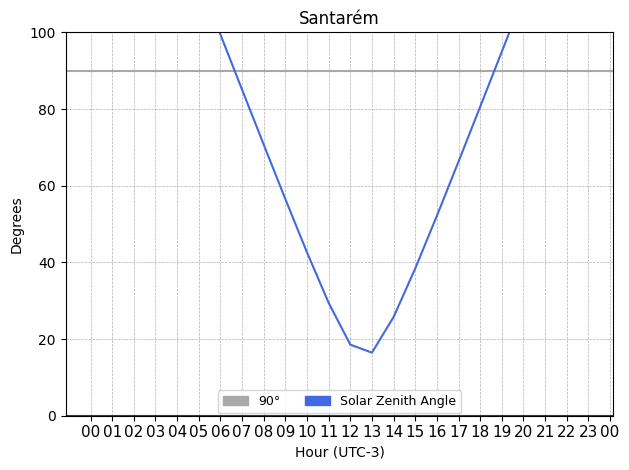

In [ ]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Horizontal lines representing key angles
ax.axhline(0, color='darkgreen')  # Line at 0 degrees, typically for sunrise/sunset
ax.axhline(90, color='darkgray')  # Line at 90 degrees, directly overhead

# Plotting the mean solar zenith angle
sns.lineplot(solar_positionstm_hmean['zenith'], ax=ax, color='royalblue')

# Grid, labels, and title
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xlabel('Hour (UTC-3)')
ax.set_ylabel('Degrees')
ax.set_title('Santarém')

# Y-axis limits
ax.set(ylim=(0, 100))

# Legend setup
gray_patch = mpatches.Patch(color='darkgray', label='90°')
blue_patch = mpatches.Patch(color='royalblue', label='Solar Zenith Angle')
ax.legend(handles=[gray_patch, blue_patch], loc='lower center', ncol=2, borderaxespad=0.2, fontsize=9)

# X-axis ticks and labels
ax.set_xticks(np.arange(0, 25, step=1))
ax.set_xticklabels(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00'], fontsize=11)

# Layout adjustment
plt.tight_layout()

# Uncomment to save the figure
# plt.savefig('Santarémhmean.png', format='png', dpi=500)



This plot provides a visual representation of how the solar zenith angle changes over the course of a day in Santarém. The horizontal lines at 0 and 90 degrees serve as references for sunrise/sunset and the sun being directly overhead, respectively. The seaborn line plot displays the average solar zenith angle for each hour of the day, providing insights into the solar elevation patterns in this location.

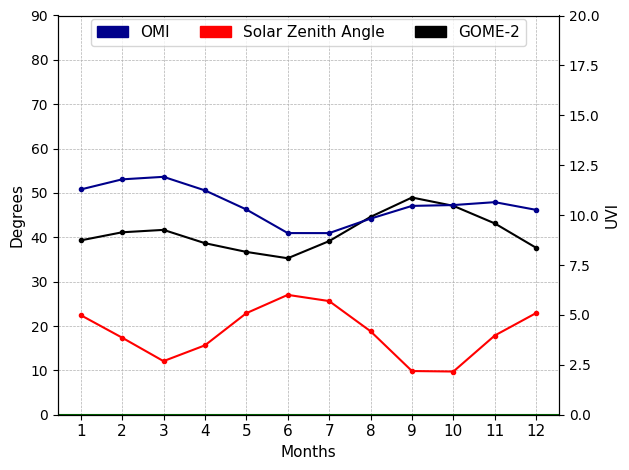

In [ ]:
# Create a figure and primary axis
fig, ax = plt.subplots()
ax3 = ax.twinx()  # Create a secondary y-axis sharing the same x-axis

# Adjust position and visibility of the secondary axis
#rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

# Add horizontal line at 0 degrees for sunrise/sunset reference
ax.axhline(0, color='darkgreen')

# Plot GOME-2 and OMI data on the secondary y-axis
omi_gome_stm_mmeanr['GOME2'].plot(ax=ax3, color='black', ylim=(0, 20), style='.-')
omi_gome_stm_mmeanr['OMI'].plot(ax=ax3, color='darkblue', ylim=(0, 20), style='.-')

# Plot solar zenith angle on the primary y-axis
solar_positionstm12mmeanr['zenith'].plot(ax=ax, color='red', style='.-')
ax.set_ylim(0, 90)

# Grid settings
ax.grid(True, linestyle='--', linewidth=0.5)

# Legend configuration
gray_patch = mpatches.Patch(color='black', label='GOME-2')
blue_patch = mpatches.Patch(color='darkblue', label='OMI')
red_patch = mpatches.Patch(color='red', label='Solar Zenith Angle')
ax.legend(handles=[blue_patch, red_patch, gray_patch], loc='upper center', ncol=3, borderaxespad=0.2, fontsize=11)

# X-axis and y-axis labels and ticks configuration
ax.set_xticks(np.arange(0, 12, step=1))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], fontsize=11)
ax.set_xlabel('Months', fontsize=11)
ax.set_ylabel('Degrees', fontsize=11)
ax3.set_ylabel('UVI', fontsize=11)

# Layout adjustment
plt.tight_layout()

# Uncomment to save the plot
# plt.savefig('sza_mothssantarem_omi_gome_uvi.png', format='png', dpi=500)



This plot visualizes the variation of the solar zenith angle (SZA) and UV index (represented by GOME-2 and OMI data) across different months. The primary y-axis (left) shows the SZA in degrees, while the secondary y-axis (right) displays the UV index values. Such a plot is valuable for understanding the relationship between solar position and UV radiation over the year in a specific location like Santarém.

The SZA is the angle measured from the surface between the Sun and a point directly above the observer. Smaller SZAs results in greater solar flux reaching the Earth's surface, this happens more frequently around noon and during summer months. At larger SZAs (at dawn and dusk time), UV is lower, as the path through the atmosphere is longer and results in more attenuation of UV through the scattering and absorption by particles and gases in the atmosphere.

At places within the Tropic ofCapricorn the sun is at its peak twice a year and the stations register two annual maximums. For Santarém, the noontime averaged UV index peaks occurred in the end of summer (around march), and in spring (around September), in the GOME-2 series, in accordance with the SZA variability. The UVI OMI series varied in agreement to the SZA variation in the rainy period, but in the dry period it peaked in November, instead of around September and October.



---

Now that we know how the UVI varies over the course of the year. How about finding out the percentage of each UVI level according to these two data sources and also by period of the year?
The Santarém region has two main periods, one with more rainfall, called the rainy season, generally occurring from January to June. It also has a period with a lower rate of precipitation, called the dry season. The dry season runs from July to December.

To do this, let's first categorize UVI according to the official WHO scale:

In [133]:
# This function is intended to categorize numerical values of the 'OMI' column into descriptive categories.
def categorise(df_stm):
    # If the 'OMI' value is greater than 0 but less than or equal to 2, it is categorized as 'Low'.
    if df_stm['OMI'] > 0 and df_stm['OMI'] <= 2:
        return 'Low'
    # If the 'OMI' value is greater than 2 but less than or equal to 5, it is categorized as 'Moderate'.
    elif df_stm['OMI'] > 2 and df_stm['OMI'] <= 5:
        return 'Moderate'
    # If the 'OMI' value is greater than 5 but less than or equal to 7, it is categorized as 'High'.
    elif df_stm['OMI'] > 5 and df_stm['OMI'] <= 7:
        return 'High'
    # If the 'OMI' value is greater than 7 but less than or equal to 10, it is categorized as 'Very High'.
    elif df_stm['OMI'] > 7 and df_stm['OMI'] <= 10:
        return 'Very High'
    # If the 'OMI' value is greater than 10, it is categorized as 'Extreme'.
    elif df_stm['OMI'] > 10:
        return 'Extreme'

# Display the first few rows of the df_stm DataFrame to verify its structure and contents.
df_stm.head()

,OMI,UVI
time,,
2005-01-01,12.0,Extreme
2005-01-02,12.0,Extreme
2005-01-03,13.0,Extreme
2005-01-04,12.0,Extreme
2005-01-05,13.0,Extreme


In [134]:
# This line adds a new column 'UVI' to the 'df_stm' DataFrame.
# The 'apply' method is used to apply a function along the axis of the DataFrame (axis=1 specifies row-wise operation).
# The 'lambda' function here is an anonymous function that takes each row of 'df_stm' and passes it to the 'categorise' function.
df_stm['UVI'] = df_stm.apply(lambda df_stm: categorise(df_stm), axis=1)

# This line displays the first five rows of the 'df_stm' DataFrame to show the newly added 'UVI' column with the categories.
df_stm.head()


,OMI,UVI
time,,
2005-01-01,12.0,Extreme
2005-01-02,12.0,Extreme
2005-01-03,13.0,Extreme
2005-01-04,12.0,Extreme
2005-01-05,13.0,Extreme


In [127]:
gome_stm.dropna(inplace=True)

In [128]:
# categorise GOME-2
def categorise(gome_stm):
    if gome_stm['GOME2'] > 0 and gome_stm['GOME2'] <= 2:
        return 'Low'
    elif gome_stm['GOME2'] > 2 and gome_stm['GOME2'] <= 5:
        return 'Moderate'
    elif gome_stm['GOME2'] > 5 and gome_stm['GOME2'] <= 7:
        return 'High'
    elif gome_stm['GOME2'] > 7 and gome_stm['GOME2'] <= 10:
        return 'Very High'
    elif gome_stm['GOME2'] > 10:
        return 'Extreme'

gome_stm.head()

,GOME2,UVI
date,,
2008-01-03,8.0,Very High
2008-01-04,10.0,Very High
2008-01-05,8.0,Very High
2008-01-07,10.0,Very High
2008-01-08,11.0,Extreme


In [129]:
gome_stm['UVI'] = gome_stm.apply(lambda gome_stm: categorise(gome_stm), axis=1)
gome_stm.head()

,GOME2,UVI
date,,
2008-01-03,8.0,Very High
2008-01-04,10.0,Very High
2008-01-05,8.0,Very High
2008-01-07,10.0,Very High
2008-01-08,11.0,Extreme


In [136]:
# Initializing an empty dictionary to hold data for each year.
omi_data = {}

# Looping through years from 2005 to 2021.
for year in range(2005, 2022):  # 2022 is not included
    # Slicing the df_stm DataFrame to get data for the specific year and storing it in the dictionary.
    omi_data[year] = df_stm.loc[str(year)]
    # Renaming the columns of this yearly DataFrame to include the year for clarity.
    omi_data[year].columns = [f'OMI-{year}', f'UVI-{year}']

# Now omi_data dictionary contains all the DataFrames.
# You can access each year's DataFrame with omi_data[year], for example, omi_data[2005].
omi_data[2005]

,OMI-2005,UVI-2005
time,,
2005-01-01,12.0,Extreme
2005-01-02,12.0,Extreme
2005-01-03,13.0,Extreme
2005-01-04,12.0,Extreme
2005-01-05,13.0,Extreme
...,...,...
2005-12-27,5.0,Moderate
2005-12-28,12.0,Extreme
2005-12-29,2.0,Low


In [137]:
# Concatenates all the yearly DataFrames from the omi_data dictionary along the columns.
omi_years = pd.concat([omi_data[year] for year in range(2005, 2022)], axis=1)

omi_years.head()

,OMI-2005,UVI-2005,OMI-2006,UVI-2006,OMI-2007,UVI-2007,OMI-2008,UVI-2008,OMI-2009,UVI-2009,...,OMI-2017,UVI-2017,OMI-2018,UVI-2018,OMI-2019,UVI-2019,OMI-2020,UVI-2020,OMI-2021,UVI-2021
time,,,,,,,,,,,,,,,,,,,,,
2005-01-01,12.0,Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-02,12.0,Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,13.0,Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,12.0,Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,13.0,Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gome_data = {}

for year in range(2008, 2022):  # 2022 is not included
    gome_data[year] = gome_stm.loc[str(year)]
    gome_data[year].columns = [f'gome-{year}', f'UVI-{year}']

# Concatenate all the GOME DataFrames along the columns
gome_years = pd.concat([gome_data[year] for year in range(2008, 2022)], axis=1)
gome_years.head()

,gome-2008,UVI-2008,gome-2009,UVI-2009,gome-2010,UVI-2010,gome-2011,UVI-2011,gome-2012,UVI-2012,...,gome-2017,UVI-2017,gome-2018,UVI-2018,gome-2019,UVI-2019,gome-2020,UVI-2020,gome-2021,UVI-2021
date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,8.0,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,10.0,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-05,8.0,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,10.0,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,11.0,Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creating monthly DataFrames for OMI and GOME
omi_months = {}
gome_months = {}

# Define the years and months to loop through
years = range(2005, 2022)
months = range(1, 13)  # 1 to 12

# Loop through each year and month for OMI
for year in years:
    for month in months:
        omi_months[(year, month)] = df_stm.loc[f'{year}-{month:02d}']

# Loop through each year and month for GOME, starting from 2008
for year in years:
    if year >= 2008:
        for month in months:
            gome_months[(year, month)] = gome_stm.loc[f'{year}-{month:02d}']

# Concatenating DataFrames for each month
# Replace "omi_jan" with "omi_months[(year, 1)]", "omi_fev" with "omi_months[(year, 2)]", etc.

omi_jan = pd.concat([omi_months[(year, 1)] for year in years], axis=0)
gome_jan = pd.concat([gome_months[(year, 1)] for year in years if year >= 2008], axis=0)

# Concatenating DataFrames for each month
omi_fev = pd.concat([omi_months[(year, 2)] for year in years], axis=0)
gome_fev = pd.concat([gome_months[(year, 2)] for year in years if year >= 2008], axis=0)

omi_mar = pd.concat([omi_months[(year, 3)] for year in years], axis=0)
gome_mar = pd.concat([gome_months[(year, 3)] for year in years if year >= 2008], axis=0)

omi_apr = pd.concat([omi_months[(year, 4)] for year in years], axis=0)
gome_apr = pd.concat([gome_months[(year, 4)] for year in years if year >= 2008], axis=0)

omi_mai = pd.concat([omi_months[(year, 5)] for year in years], axis=0)
gome_mai = pd.concat([gome_months[(year, 5)] for year in years if year >= 2008], axis=0)

omi_jun = pd.concat([omi_months[(year, 6)] for year in years], axis=0)
gome_jun = pd.concat([gome_months[(year, 6)] for year in years if year >= 2008], axis=0)

omi_jul = pd.concat([omi_months[(year, 7)] for year in years], axis=0)
gome_jul = pd.concat([gome_months[(year, 7)] for year in years if year >= 2008], axis=0)

omi_ago = pd.concat([omi_months[(year, 8)] for year in years], axis=0)
gome_ago = pd.concat([gome_months[(year, 8)] for year in years if year >= 2008], axis=0)

omi_set = pd.concat([omi_months[(year, 9)] for year in years], axis=0)
gome_set = pd.concat([gome_months[(year, 9)] for year in years if year >= 2008], axis=0)

omi_oct = pd.concat([omi_months[(year, 10)] for year in years], axis=0)
gome_oct = pd.concat([gome_months[(year, 10)] for year in years if year >= 2008], axis=0)

omi_nov = pd.concat([omi_months[(year, 11)] for year in years], axis=0)
gome_nov = pd.concat([gome_months[(year, 11)] for year in years if year >= 2008], axis=0)

omi_dez = pd.concat([omi_months[(year, 12)] for year in years], axis=0)
gome_dez = pd.concat([gome_months[(year, 12)] for year in years if year >= 2008], axis=0)

# Concatenating DataFrames for rainy season (example for January to June)
omi_rainy = pd.concat([omi_months[(year, month)] for year in years for month in range(1, 7)], axis=0)
gome_rainy = pd.concat([gome_months[(year, month)] for year in years if year >= 2008 for month in range(1, 7)], axis=0)

omi_dry = pd.concat([omi_months[(year, month)] for year in years for month in range(8, 13)], axis=0)
gome_dry = pd.concat([gome_months[(year, month)] for year in years if year >= 2008 for month in range(8, 13)], axis=0)

omi_rainy.head(),  gome_rainy.head(), omi_dry.head(),  gome_dry.head()

(             OMI      UVI
 time                     
 2005-01-01  12.0  Extreme
 2005-01-02  12.0  Extreme
 2005-01-03  13.0  Extreme
 2005-01-04  12.0  Extreme
 2005-01-05  13.0  Extreme,
             GOME2        UVI
 date                        
 2008-01-03    8.0  Very High
 2008-01-04   10.0  Very High
 2008-01-05    8.0  Very High
 2008-01-07   10.0  Very High
 2008-01-08   11.0    Extreme,
              OMI        UVI
 time                       
 2005-08-01  10.0  Very High
 2005-08-02  10.0  Very High
 2005-08-03  10.0  Very High
 2005-08-04  11.0    Extreme
 2005-08-05  10.0  Very High,
             GOME2        UVI
 date                        
 2008-08-02   10.0  Very High
 2008-08-03    9.0  Very High
 2008-08-05    9.0  Very High
 2008-08-07   10.0  Very High
 2008-08-08   10.0  Very High)

The next code calculates the value counts of the 'UVI' column for different DataFrames representing rainy and dry seasons for two datasets (presumably OMI and GOME). It then converts these counts into separate DataFrames. Finally, it returns a tuple with all these new DataFrames for us to view the results

In [ ]:
# Calculate the value counts of the 'UVI' column for the OMI dataset during the rainy season
# and convert the series to a DataFrame.
cts1r = omi_rainy.UVI.value_counts().to_frame()

# Calculate the value counts of the 'UVI' column for the OMI dataset during the dry season
# and convert the series to a DataFrame.
cts1d = omi_dry.UVI.value_counts().to_frame()

# Calculate the value counts of the 'UVI' column for the GOME dataset during the rainy season
# and convert the series to a DataFrame.
cts2r = gome_rainy.UVI.value_counts().to_frame()

# Calculate the value counts of the 'UVI' column for the GOME dataset during the dry season
# and convert the series to a DataFrame.
cts2d = gome_dry.UVI.value_counts().to_frame()

# Return a tuple containing all four DataFrames so you can compare the frequency distribution
# of UVI categories between the rainy and dry seasons for both OMI and GOME datasets.
cts1r, cts2r, cts1d, cts2d


(            UVI
 Extreme    1556
 Very High   808
 High        158
 Moderate     65
 Low           7,
             UVI
 Very High  1032
 Extreme     456
 High        269
 Moderate    161
 Low          65,
             UVI
 Extreme    1180
 Very High   919
 High         45
 Moderate     29
 Low           3,
            UVI
 Very High  759
 Extreme    747
 High       101
 Moderate    60
 Low         14)

When we execute this code, it should display the value counts for each category of the 'UVI' column in the respective DataFrames. The value counts will show how many times each unique value appears in the 'UVI' column. Converting these counts to a DataFrame allows for easier manipulation and visualization if we plan to graph or analyze the distribution further.



In [138]:
# Concatenates the value counts DataFrames for both OMI and GOME-2 datasets across rainy and dry seasons side by side.
ctsogrd = pd.concat([cts1r, cts2r, cts1d, cts2d], axis=1)

# Renames the columns of the concatenated DataFrame to reflect the dataset and season.
ctsogrd.columns=['OMI-Rainy', 'GOME-2-Rainy', 'OMI-Dry', 'GOME-2-Dry']

# Concatenates the value counts DataFrames for the OMI dataset across rainy and dry seasons side by side.
ctsord = pd.concat([cts1r, cts1d], axis=1)

# Renames the columns of the concatenated DataFrame to reflect the OMI dataset and the season.
ctsord.columns=['OMI-Rainy', 'OMI-Dry']


These DataFrames, ctsogrd and ctsord, provide a tabular comparison of the UVI distribution between different seasons and datasets. We can further use these DataFrames for analysis or visualization, such as creating bar charts to visually compare the seasonal differences in UVI frequency counts.

In [139]:
# Transposes the DataFrame to switch rows and columns, which can be useful for plotting or when the DataFrame needs to be reoriented.
ctsogrdt = ctsogrd.T

# Transposes the DataFrame for the OMI dataset, switching its rows and columns.
ctsordt = ctsord.T


This transformation makes it easier to compare the frequency of each UVI category across different datasets and seasons. For example, in the transposed DataFrames, each UVI category becomes a column, and you can easily compare the frequency of that category across different conditions (rainy or dry season and OMI or GOME-2 dataset) which are now rows.

In [ ]:
# Applies a function to each row of the DataFrame 'ctsogrdt'.
# The lambda function takes each row 'x', and for each element in the row, it calculates the percentage that the element
# contributes to the sum of all elements in that row.
stacked_data = ctsogrdt.apply(lambda x: x*100/sum(x), axis=1)

The result, stacked_data, is a DataFrame where each cell now contains the percentage contribution of that category to the total for each condition (i.e., 'OMI-Rainy', 'GOME-2-Rainy', 'OMI-Dry', 'GOME-2-Dry'). This transformation is particularly useful for data visualization purposes, such as when creating stacked bar plots, where it's more informative to compare proportions rather than raw counts.

(0.0, 100.0)

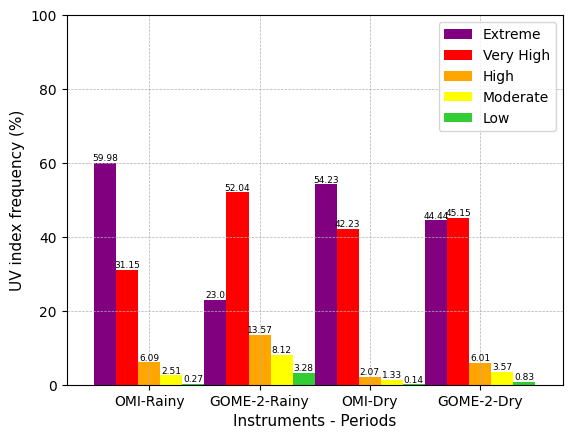

In [ ]:

# initialize the figure and axes
fig, ax = plt.subplots()

stacked_data.plot(kind="bar", stacked=False, rot=0, color=['purple', 'red', 'orange', 'yellow', 'limegreen'], width=1, ax=ax)
ax.grid(True, linestyle='--', linewidth=0.5)

# Adding bar labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, label_type='edge', labels=labels, rotation=0, color='black', size=6.5)

# Setting legend, labels, and y-axis limits
ax.legend(loc='upper right', ncol=1)
ax.set_xlabel('Instruments - Periods', fontsize=11)
ax.set_ylabel('UV index frequency (%)', fontsize=11)
ax.set_ylim(0, 100)

# Uncomment to save the figure
# plt.savefig('peridossatelitesbarplot.png', format='png', dpi=500)


This bar chart is useful for comparing the distribution of UVI frequency percentages across different conditions and datasets (OMI and GOME-2) for both rainy and dry seasons.
Such a visualization aids in identifying patterns, trends, or anomalies in UVI distribution across different times and conditions.
It helps in making data-driven decisions or inferences, particularly in meteorological or environmental studies where understanding UVI patterns is crucial.
The visual representation makes it easier to communicate these patterns to both technical and non-technical audiences.

 This fugure shows the frequency of the UV index levels as a function of the instrument (OMI, GOME-2) and of the period of the year (rainy or dry seasons). According to the U.S. Environmental Protection Agency (Epa) a low danger from the sun’s UV rays only occurs when the UV  index ranges from 0 to 2. Even so, it is recommended to wear sunglasses  on  clear days,  protect yourself  with  clothing, and  use broad  spectrum SPF30+ sunscreen (Epa, 2017).
   

* Only 0.27% of the noontime UV index levels under all sky conditions  were low during the  rainy  period

* and 0.14% during  the  dry period, according with the OMI series
* The GOME-2 series presented a bit higher percentage of Low levels, 3.38% and 0.83, rainy and dry period respectively.
* Together, moderate, high, and very high UVI levels represent 39.75% of the UVI incident at noontime  during the rainy period in Santarém and 45.63% during  the dry period, for the OMI series.
* Even during the rainy period, when there are greater presence of cloud cover and precipitation, approximately 60% of the incident UV index at Santarém at noontime is extreme.
* For the GOME-2 series just 23% of the UVI levels were extreme during the rainy period and 44.44% in  the dry  period.

**In summary**, the dry period showed higher average UVI, according to the GOME-2 series, with 11 (extreme) being the average UVI in the dry period and 10 (very high) being the average UVI in the rainy period, at noontime. The average was also between very high and extreme in the OMI series, but with the rainy period being extreme. These characteristics of both time series reinforce that during the rainy as well the dry period the maximum protective measures need to be taken to avoid overexposure to UV.



---

So it's clear how important and useful data science is for atmospheric sciences. In a few lines of code, we were able to visualize and calculate the monthly and seasonal variation of the UVI from two different data sources, as well as discovering the percentage of each ultraviolet index level for each source (OMI and GOME-2) and for different periods of the year (rainy season, dry season).

More advanced analyses will be carried out in future tutorials.